# Assignment on Classification


## Importing the python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat

## Loading dataset to python

In [2]:
data=pd.read_excel('iris_n.xls')

## Checking the basic details of data set

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Preprocessing

## Checking for null values in the dataset

In [7]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

### Data set contains nullvalues so we have to fill it after finding the distribution

## Finding the distribution of missing value columns

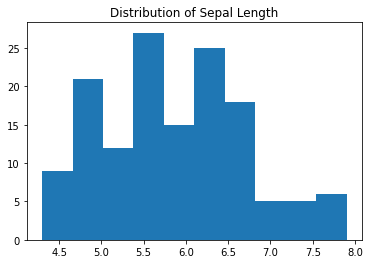

In [8]:
#Finding the distribution of Sepal Length Column
plt.hist(data['SL'])
plt.title('Distribution of Sepal Length')
plt.show()

In [9]:
#Data is Right skewed so use median to fill the data

In [10]:
#filling the null values columns with Median
data['SL'] = data['SL'].fillna(data['SL'].median())
data.isna().sum()

SL                0
SW                6
PL                6
PW                0
Classification    0
dtype: int64

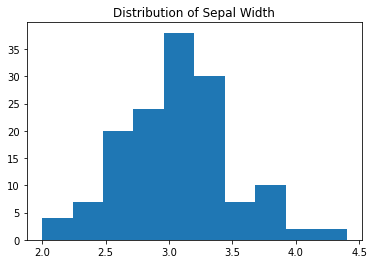

In [11]:
#Finding the Distribution of sepal width column
plt.hist(data['SW'])
plt.title('Distribution of Sepal Width')
plt.show()

In [12]:
#Data is uniformly distributed so use mean to fill the data

In [13]:
# Filling sepal Width column with Mean
data['SW'] = data['SW'].fillna(data['SW'].mean())
data.isna().sum()

SL                0
SW                0
PL                6
PW                0
Classification    0
dtype: int64

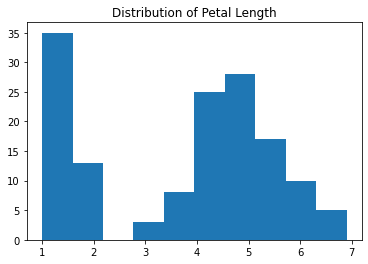

In [14]:
#Finding the distribution of petal length Column
plt.hist(data['PL'])
plt.title('Distribution of Petal Length')
plt.show()

In [15]:
# Filling petal length column with Median
data['PL'] = data['PL'].fillna(data['PL'].median())
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

## All null values are filled in the dataset

## Checking for Outliers

### Checking for outliers in Sepal Length Column

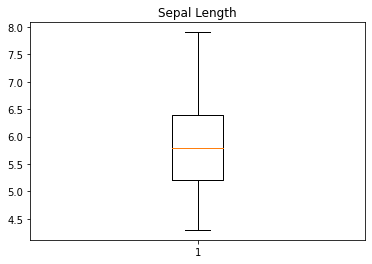

In [16]:
plt.boxplot(data['SL'])
plt.title('Sepal Length')
plt.show()

In [17]:
#NO ouliers in sepal length column

### Checking for outliers in Sepal Width column

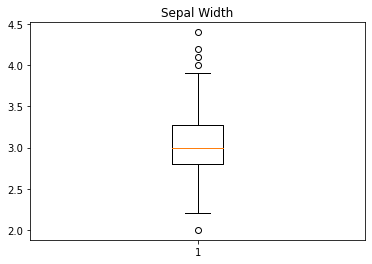

In [18]:
plt.boxplot(data['SW'])
plt.title('Sepal Width')
plt.show()

In [19]:
#There are some ouliers in sepal width column

In [20]:
#Using IQR method to find the indexes of the Outliers
Qu1=np.percentile(data['SW'],25,interpolation='midpoint')
Qu2=np.percentile(data['SW'],50,interpolation='midpoint')
Qu3=np.percentile(data['SW'],75,interpolation='midpoint')

In [21]:
print(Qu1,Qu2,Qu3)

2.8 3.0 3.25


In [22]:
iqr=Qu3-Qu1
iqr

0.4500000000000002

In [23]:
low_limit=Qu1-1.5*iqr
up_limit=Qu3+1.5*iqr
print(low_limit,up_limit)

2.1249999999999996 3.9250000000000003


In [24]:
outliers1=[]
for i in data['SW']:
    if(i>up_limit) or (i<low_limit):
        outliers1.append(i)
len(outliers1)

5

In [25]:
#There are totally five outliers in SW coloumn

In [26]:
ind1=data['SW']>up_limit
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [27]:
ind2=data['SW']<low_limit
data.loc[ind2].index

Int64Index([60], dtype='int64')

### As our data set is small we cannot drop the outlier columns

### Checking for outliers in Petal Length column

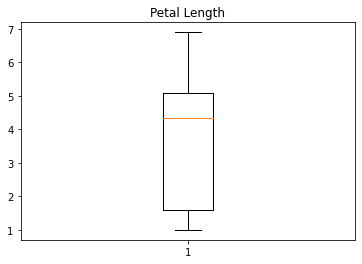

In [28]:
plt.boxplot(data['PL'])
plt.title('Petal Length')
plt.show()

In [29]:
##There are no ouliers in Petal length column

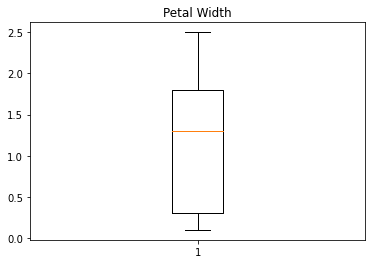

In [30]:
plt.boxplot(data['PW'])
plt.title('Petal Width')
plt.show()

In [31]:
##There are no ouliers in Petal Width column

## All the missing values are filled and  preprocessing is completed

***

# Checking for correlation in the data

In [32]:
corrmatrix=data.corr()

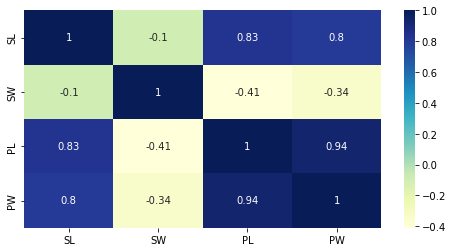

In [33]:
plt.subplots(figsize=(8,4))
sns.heatmap(corrmatrix,annot=True,vmin=-0.41,vmax=1,cmap='YlGnBu')
plt.show()

In [34]:
# AS per correlation matrix maximum correlation value is obtained as 0.94 and minimum correaltion is abtained as -0.41 

***


## Splitting the data into features and target

In [35]:
X=data.drop('Classification',axis=1)
y=data['Classification']
#Classification column is taken as target and SL,SW,PL and PW as Features

In [36]:
#features Data
X.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
#Target data
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Classification, dtype: object

## Splitting the data into training and testing set

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,random_state=42,test_size=0.2)

# Logistic Model

In [39]:
#importing Model Checking Metrices
from sklearn.metrics import accuracy_score,confusion_matrix

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logit_model=LogisticRegression(max_iter=5000)
logit_model=logit_model.fit(X_train,Y_train)
y_pred_logit=logit_model.predict(X_test)

In [42]:
confusion_matrix(Y_test,y_pred_logit)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [43]:
a1=accuracy_score(Y_test,y_pred_logit)
a1

1.0

In [44]:
#The accuracy is obtained as 1 on logistic regression model

# kNN Model

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
metric_k=[]
neighbors=range(3,18)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,Y_train)
    y_pred_kNN=classifier.predict(X_test)
    acc=accuracy_score(Y_test,y_pred_kNN)
    metric_k.append(acc)

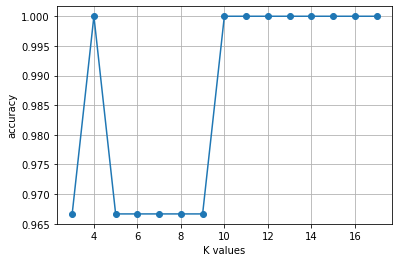

In [47]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K values')
plt.ylabel('accuracy')
plt.grid()

### Maximum accuracy is obtained at k=4


In [48]:
kNN=KNeighborsClassifier(n_neighbors=4)
kNN=kNN.fit(X_train,Y_train)
y_pred_kNN=kNN.predict(X_test)

In [49]:
a2=accuracy_score(Y_test,y_pred_kNN)
a2

1.0

In [50]:
confusion_matrix(Y_test,y_pred_kNN)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [51]:
#The accuracy is obtained as 1 in kNN model

# SVC MODEL (Support Vector Classifier Model)

In [52]:
from sklearn.svm import SVC

## SVC MODEL  with linear Kernel

In [53]:
clf_svm=SVC(kernel='linear')
clf_svm=clf_svm.fit(X_train,Y_train)
y_pred_svm=clf_svm.predict(X_test)

In [54]:
confusion_matrix(Y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [55]:
a3=accuracy_score(Y_test,y_pred_svm)
a3

1.0

In [56]:
#The accuracy is obtained as 1 in SVC model with linear kernel

## SVC MODEL With  RBF (Radial basis function)  Kernel

In [57]:
clf_svm2=SVC(kernel='rbf')
clf_svm2=clf_svm2.fit(X_train,Y_train)
y_pred_svm2=clf_svm2.predict(X_test)

In [58]:
confusion_matrix(Y_test,y_pred_svm2)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [59]:
a4=accuracy_score(Y_test,y_pred_svm2)
a4

1.0

In [60]:
#The accuracy is obtained as 1 in SVC model with rbf kernel


# Decision Tree Model

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt_clf=DecisionTreeClassifier()
df_clf=dt_clf.fit(X_train,Y_train)
Y_pred_dt=dt_clf.predict(X_test)

In [63]:
confusion_matrix(Y_test,Y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [64]:
a5=accuracy_score(Y_test,Y_pred_dt)
a5

1.0

In [65]:
#The accuracy is obtained as 1 in Decesion Tree model

# Random Forest Model

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(X_train,Y_train)
y_pred_clf=rf_clf.predict(X_test)


In [68]:
confusion_matrix(Y_test,y_pred_clf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [69]:
a6=accuracy_score(Y_test,y_pred_clf)
a6

1.0

In [70]:
#The accuracy is obtained as 1 in Random Forest model


## The accuracy scores obtained are tabulated below

In [71]:
#Creating a dataframe with all accuracy scores
accuracy={'Model Name':['Logistic','kNN','SVC-LInear','SVC-rbf','Decision Tree','Random Forest'],'Accuracy score':[a1,a2,a3,a4,a5,a6]}
df=pd.DataFrame(accuracy)
df

,Model Name,Accuracy score
0,Logistic,1.0
1,kNN,1.0
2,SVC-LInear,1.0
3,SVC-rbf,1.0
4,Decision Tree,1.0
5,Random Forest,1.0


### Accuracy score is obtained as one for all the 6 models. So all the models are equally good. In this case the data set is small, if the data set is larger we can get a better under understanding of models. As a next step  scaling can be done to check the performance of models under fature scaled condition and to avoid weightage to large value points

***

# Standard scaling the features and finding the accuracy

In [72]:
from sklearn import preprocessing
std_scl=preprocessing.StandardScaler()

In [73]:
x1=std_scl.fit_transform(X)

In [74]:
type(x1)

numpy.ndarray

In [75]:
x1=pd.DataFrame(x1,columns=['SL','SW','PL','PW'])

In [76]:
#The features data set after standard scaling
x1.head()

,SL,SW,PL,PW
0,-0.934811,1.071869,-1.380791,-1.312977
1,-1.182990,-0.117261,-1.380791,-1.312977
2,-0.066181,0.358391,-1.438808,-1.312977
3,-1.555260,0.120565,-1.322775,-1.312977
4,-1.058900,1.309695,-1.380791,-1.312977


In [77]:
#Splitting the data into training and testing set after scaling
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x1,y,random_state=42,test_size=0.2)

## Logistic Model-Standard scaled

In [78]:
logit_model2=LogisticRegression()
logit_model2=logit_model2.fit(X_train,Y_train)
y_pred_logit2=logit_model2.predict(X_test)

In [79]:
confusion_matrix(Y_test,y_pred_logit2)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [80]:
a7=accuracy_score(Y_test,y_pred_logit2)
a7

0.9666666666666667

In [81]:
#The accuracy score is obtained as 0.9667 after scaling in logistic model

## kNN Model-Standard scaled

In [82]:
metric_k=[]
neighbors=range(3,18)
for k in neighbors:
    classifier2=KNeighborsClassifier(n_neighbors=k)
    classifier2=classifier2.fit(X_train,Y_train)
    y_pred_kNN3=classifier2.predict(X_test)
    acc=accuracy_score(Y_test,y_pred_kNN3)
    metric_k.append(acc)

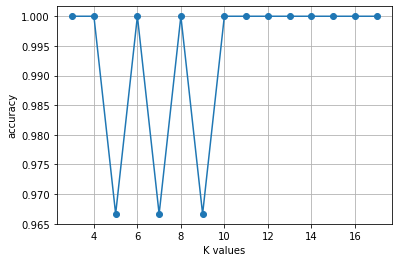

In [83]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K values')
plt.ylabel('accuracy')
plt.grid()

In [84]:
#Finding Accuarcy at K=2
kNN2=KNeighborsClassifier(n_neighbors=2)
kNN2=kNN2.fit(X_train,Y_train)
y_pred_kNN4=kNN2.predict(X_test)

In [85]:
confusion_matrix(Y_test,y_pred_kNN4)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [86]:
a8=accuracy_score(Y_test,y_pred_kNN4)
a8

1.0

In [87]:
#The accuracy score is obtained as 1 after scaling in kNN Model

## SVC Model Linear Kernel-Standard scaled

In [88]:
clf_svm3=SVC(kernel='linear')
clf_svm3=clf_svm3.fit(X_train,Y_train)
y_pred_svm3=clf_svm3.predict(X_test)

In [89]:
confusion_matrix(Y_test,y_pred_svm3)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [90]:
a9=accuracy_score(Y_test,y_pred_svm3)
a9

0.9666666666666667

In [91]:
#The accuracy score is obtained as 0.9667 after scaling in SVC-Linear Model

## SVC Model  RBF Kernel-Standard scaled

In [92]:
clf_svm4=SVC(kernel='rbf')
clf_svm4=clf_svm4.fit(X_train,Y_train)
y_pred_svm4=clf_svm4.predict(X_test)

In [93]:
confusion_matrix(Y_test,y_pred_svm4)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [94]:
a10=accuracy_score(Y_test,y_pred_svm4)
a10

0.9666666666666667

In [95]:
#The accuracy score is obtained as 0.9667 after scaling inin SVC-rbf model

## Decision Tree Model-Standard scaled

In [96]:
dt_clf2=DecisionTreeClassifier()
df_clf2=dt_clf2.fit(X_train,Y_train)
Y_pred_dt2=dt_clf2.predict(X_test)

In [97]:
confusion_matrix(Y_test,Y_pred_dt2)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [98]:
a11=accuracy_score(Y_test,Y_pred_dt2)
a11

1.0

In [99]:
#The accuracy score is obtained as 1 after scaling in Decision tree model

## Random Forest Model-Standard scaled

In [100]:
rf_clf2=RandomForestClassifier()
rf_clf2=rf_clf2.fit(X_train,Y_train)
y_pred_rf2=rf_clf2.predict(X_test)

In [101]:
confusion_matrix(Y_test,y_pred_rf2)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [102]:
a12=accuracy_score(Y_test,y_pred_rf2)
a12

1.0

In [103]:
#The accuracy score is obtained as 1 after scaling in random Forest model

In [104]:
#Creating a dataframe with all accuracy scores before and after scaling
accuracy={'Model Name':['Logistic','kNN','SVC-Linear','SVC-rbf','Decision Tree','Random Forest'],'Accuracy score without scaling':[a1,a2,a3,a4,a5,a6],'Accuracy score with standard scaling ':[a7,a8,a9,a10,a11,a12]}
df2=pd.DataFrame(accuracy)
df2

,Model Name,Accuracy score without scaling,Accuracy score with standard scaling
0,Logistic,1.0,0.966667
1,kNN,1.0,1.000000
2,SVC-Linear,1.0,0.966667
3,SVC-rbf,1.0,0.966667
4,Decision Tree,1.0,1.000000
5,Random Forest,1.0,1.000000


In [105]:
#In The standard scaled models the scores are changed in Logistic and 2 SVC models and rest are same

***

# Applying Min Max Scaling in models and finding accuracy

In [106]:
from sklearn.preprocessing import MinMaxScaler
min_max_scalar=preprocessing.MinMaxScaler(feature_range=(0,1))

In [107]:
x2=min_max_scalar.fit_transform(X)

In [108]:
x2=pd.DataFrame(x1,columns=['SL','SW','PL','PW'])

In [109]:
#Splitting the data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x2,y,random_state=42,test_size=0.2)

## Logistic Model-Min Max Scaling


In [110]:
logit_model3=LogisticRegression()
logit_model3=logit_model3.fit(X_train,Y_train)
y_pred_logit3=logit_model3.predict(X_test)

In [111]:
confusion_matrix(Y_test,y_pred_logit3)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [112]:
a13=accuracy_score(Y_test,y_pred_logit3)
a13

0.9666666666666667

In [113]:
#The accuracy score is obtained as 0.967 after min max scaling in logistic model

## kNN Model-Min Max Scaling

In [114]:
metric_k=[]
neighbors=range(3,18)
for k in neighbors:
    classifier3=KNeighborsClassifier(n_neighbors=k)
    classifier3=classifier3.fit(X_train,Y_train)
    y_pred_kNN5=classifier3.predict(X_test)
    acc=accuracy_score(Y_test,y_pred_kNN5)
    metric_k.append(acc)

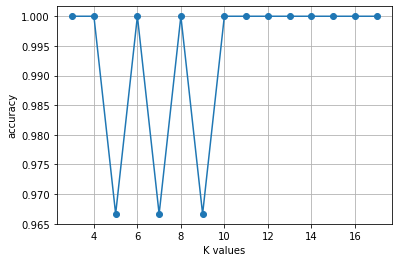

In [115]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K values')
plt.ylabel('accuracy')
plt.grid()

In [116]:
#Finding Accuracy at K=2
kNN3=KNeighborsClassifier(n_neighbors=2)
kNN3=kNN3.fit(X_train,Y_train)
y_pred_kNN6=kNN3.predict(X_test)

In [117]:
confusion_matrix(Y_test,y_pred_kNN6)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [118]:
a14=accuracy_score(Y_test,y_pred_kNN6)
a14

1.0

In [119]:
#The accuracy score is obtained as 1 after min max scaling in kNN model

## SVC Model Linear Kernel-Min Max scaling

In [120]:
clf_svm5=SVC(kernel='linear')
clf_svm5=clf_svm5.fit(X_train,Y_train)
y_pred_svm5=clf_svm5.predict(X_test)

In [121]:
confusion_matrix(Y_test,y_pred_svm5)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [122]:
a15=accuracy_score(Y_test,y_pred_svm5)
a15

0.9666666666666667

In [123]:
#The accuracy score is obtained as 0.967 after min max scaling in SVC-linear model

## SVC Model Rbf Kernel-Min Max scaling

In [124]:
clf_svm6=SVC(kernel='rbf')
clf_svm6=clf_svm6.fit(X_train,Y_train)
y_pred_svm6=clf_svm6.predict(X_test)

In [125]:
confusion_matrix(Y_test,y_pred_svm6)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [126]:
a16=accuracy_score(Y_test,y_pred_svm6)
a16

0.9666666666666667

In [127]:
#The accuracy score is obtained as 0.967 after min max scaling in SVC-rbf model

## Decision tree Model - Min Max Scaling

In [128]:
dt_clf3=DecisionTreeClassifier()
df_clf3=dt_clf3.fit(X_train,Y_train)
Y_pred_dt3=dt_clf3.predict(X_test)

In [129]:
confusion_matrix(Y_test,Y_pred_dt3)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [130]:
a17=accuracy_score(Y_test,Y_pred_dt3)
a17

1.0

In [131]:
#The accuracy score is obtained as 1 after min max scaling in decision tree model

## Random Forest Model- Min Max Scaling

In [132]:
rf_clf3=RandomForestClassifier()
rf_clf3=rf_clf3.fit(X_train,Y_train)
y_pred_rf3=rf_clf3.predict(X_test)

In [133]:
confusion_matrix(Y_test,y_pred_rf3)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [134]:
a18=accuracy_score(Y_test,y_pred_rf3)
a18

1.0

In [135]:
#The accuracy score is obtained as 1 after min max scaling in random forest model

In [136]:
# Creating a dataframe with all accuracy scores before and after scaling
accuracy={'Model Name':['Logistic','kNN','SVC-Linear','SVC-RBF','Decision Tree','Random Forest'],'Accuracy score without scaling':[a1,a2,a3,a4,a5,a6],'Score after standard scaling':[a7,a8,a9,a10,a11,a12],' Score after Min max scaling ':[a13,a14,a15,a16,a17,a18]}
df3=pd.DataFrame(accuracy)
df3

,Model Name,Accuracy score without scaling,Score after standard scaling,Score after Min max scaling
0,Logistic,1.0,0.966667,0.966667
1,kNN,1.0,1.000000,1.000000
2,SVC-Linear,1.0,0.966667,0.966667
3,SVC-RBF,1.0,0.966667,0.966667
4,Decision Tree,1.0,1.000000,1.000000
5,Random Forest,1.0,1.000000,1.000000


### The accuracy scores are find out after standard and Min max scaling. Scaling doesnot affect the accuracy scores of kNN,Decsion tree and random Forest Models. But the scores of Logistic and SVC models gives slightly lower values after scaling. Generally the scores are higher in all models. So all the models are performing equally good in 20% test size conditions 

## Cross validation is to be done on all models to test the whole data set and to find out any bias is there in test sampling

# Cross Validation

In [137]:
#Creating Test train split in the data after scaling
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,random_state=42,test_size=0.2)

## Cross validation is done to better understand the whole dataset instead of doing the calculation in a 20%  test size

In [138]:
from sklearn.model_selection import cross_validate

## Logistic Model-Cross Validation

In [139]:
from sklearn.model_selection import cross_validate
cvs_lr=cross_validate(logit_model,X,y,cv=5)
c1=cvs_lr['test_score'].mean()
c1

0.9466666666666667

## kNN Model Cross-Validation

In [140]:
cvs_knn=cross_validate(kNN,X,y,cv=5)
c2=cvs_knn['test_score'].mean()
c2

0.9666666666666668

## SVC Model  Linear kernel-Cross Validation

In [141]:
cvs_svm=cross_validate(clf_svm,X,y,cv=5)
c3=cvs_svm['test_score'].mean()
c3

0.9600000000000002

## SVC Model RBF kernel-Cross validation

In [142]:
cvs_svm=cross_validate(clf_svm2,X,y,cv=5)
c4=cvs_svm['test_score'].mean()
c4

0.9400000000000001

## Decision Tree Model-Cross validation

In [143]:
cvs_dt=cross_validate(dt_clf,X,y,cv=5)
c5=cvs_dt['test_score'].mean()
c5

0.9533333333333334

## Random Forest Model-Cross validation

In [144]:
cvs_rf=cross_validate(rf_clf,X,y,cv=5)
c6=cvs_rf['test_score'].mean()
c6

0.9666666666666668

In [145]:
#Creating a dataframe with all accuracy scores before and after cross valiadtion
accuracy={'Model Name':['Logistic','kNN','SVC-Linear','SVC-RBF','Decision Tree','Random Forest'],'Accuracy score' :[a1,a2,a3,a4,a5,a6],'Cross validation Score':[c1,c2,c3,c4,c5,c6]}
df4=pd.DataFrame(accuracy)
df4

,Model Name,Accuracy score,Cross validation Score
0,Logistic,1.0,0.946667
1,kNN,1.0,0.966667
2,SVC-Linear,1.0,0.960000
3,SVC-RBF,1.0,0.940000
4,Decision Tree,1.0,0.953333
5,Random Forest,1.0,0.966667


### After the cross validation of all six models and comparing it with accuarcy scores before cross validation we can say that kNN,SVC-Linear and random forest are slightly better than other models. In kNN model the best k value from the graph so it gives slightly better scores.Also SVC linear considers most data points and Random Forest is an improved version of Decison tree models. But generally all the models are performing equally good in different conditions in this data set.

### Here the data set Considered is a small one and less complex one. Working on large datasets set will give better idea about all classification models

***
***